In [52]:
pip install ucimlrepo

In [53]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

Extracting of the dataset is done.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x=pd.DataFrame(X)
y=pd.DataFrame(y)

In [55]:
x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [56]:
y.head()

""


In [57]:
x.isnull().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [58]:
x.drop_duplicates()# dropping the duplicates

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [59]:
x.dropna(axis=0,inplace=True)
# we can't use imputer or any other technique to fill in the null values of customer id as
# might effect our analysis further. So, we'll drop it and we are left with almost 75% of the
# original dataset.

In [60]:
x=x[(x['Quantity']>0)&(x['UnitPrice']>0)] # eliminating anomalies in quantity and unitPrice

In [61]:
x['TotalAmount']=x['Quantity']*x['UnitPrice']# add a new column as TotalAmount which basically
# shows the sales

<ipython-input-61-c10e4dcc5947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['TotalAmount']=x['Quantity']*x['UnitPrice']# add a new column as TotalAmount which basically


In [62]:
# Extracting day,month,year from InvoiceDate
from datetime import datetime
x['InvoiceDate']=pd.to_datetime(x['InvoiceDate'])
x['InvoiceMonth']=x['InvoiceDate'].dt.month
x['InvoiceYear']=x['InvoiceDate'].dt.year
x['InvoiceDay']=x['InvoiceDate'].dt.day
x['Weekday']=x['InvoiceDate'].dt.weekday
x['Weekday']=np.where(x.Weekday == 0,7, x.Weekday)

x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,2
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,2
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2


In [63]:
temp_x= x.set_index('InvoiceDate')
temp_x.head()

,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,12,2010,1,2
2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,12,2010,1,2
2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2


In [64]:
# spliting the series to predict the last 3 months of 2011
train_df= temp_x.loc['2010-01-01':'2011-12-09'].reset_index(drop=False)
test_df= temp_x.loc['2011-10-01':].reset_index(drop=False)
train_df.head()

,InvoiceDate,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday
0,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,12,2010,1,2
1,2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
2,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,12,2010,1,2
3,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2
4,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,12,2010,1,2


In [65]:
# calculating and adding Monthly revenue
MonthlyRevenue=x.groupby(['InvoiceMonth'])['TotalAmount'].sum()
x=x.merge(MonthlyRevenue,on='InvoiceMonth',how='left')
x.rename(columns={'TotalAmount_x':'TotalAmount','TotalAmount_y':'MonthlyRevenue'},inplace=True)
x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday,MonthlyRevenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,2,1090906.68
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,2,1090906.68
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68


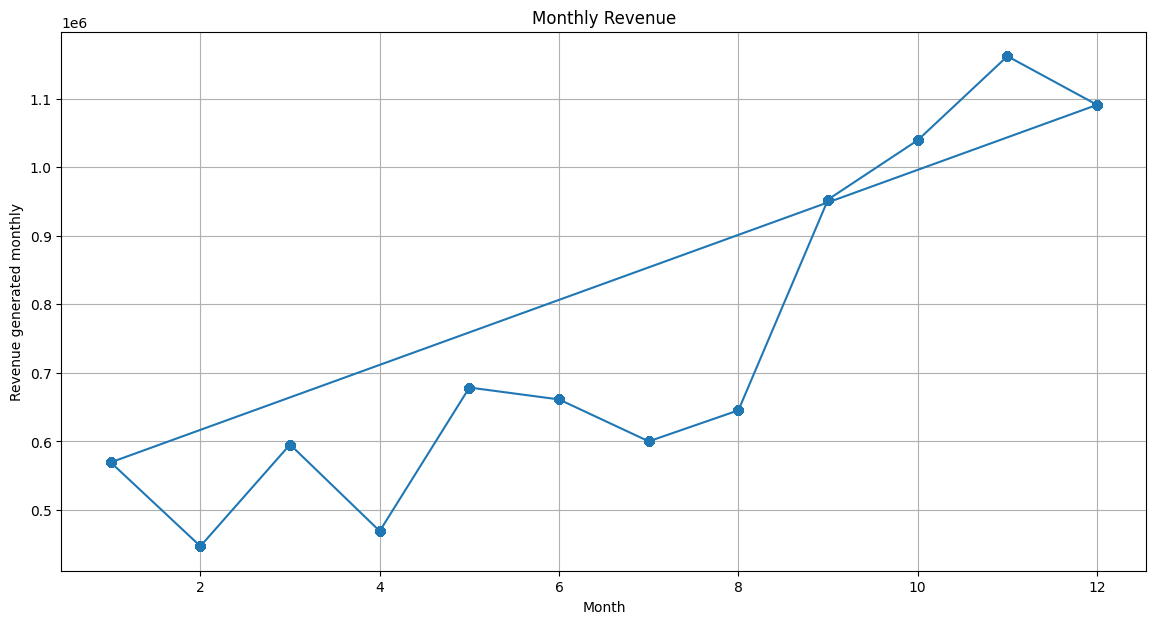

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(x['InvoiceMonth'], x['MonthlyRevenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue generated monthly')
plt.grid(True)
plt.show()
# The graph below shows us the monthly revenue and month-11 November has the highest purchase.

In [67]:
#calculating and adding yealy revenue to the dataframe
YearlyRevenue=x.groupby(['InvoiceYear'])['TotalAmount'].sum()
x=x.merge(YearlyRevenue,on='InvoiceYear',how='left')
x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount_x,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday,MonthlyRevenue,TotalAmount_y
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,2,1090906.68,572713.89
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,2,1090906.68,572713.89
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89


In [68]:
x.rename(columns={'TotalAmount_x':'TotalAmount','TotalAmount_y':'YearlyRevenue'},inplace=True)
x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday,MonthlyRevenue,YearlyRevenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,2,1090906.68,572713.89
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,2,1090906.68,572713.89
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89


In [69]:
x['InvoiceYear'].unique()

array([2010, 2011], dtype=int32)

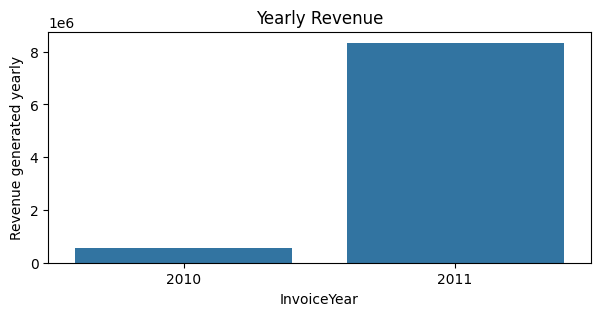

In [70]:
plt.figure(figsize=(7,3))
sns.barplot( y=x['YearlyRevenue'],x=x['InvoiceYear'])
plt.title('Yearly Revenue')
plt.xlabel('InvoiceYear')
plt.ylabel('Revenue generated yearly')
plt.show()
#Below shows the yealy revenue and 2011 is where the maximum revenue was genereated.

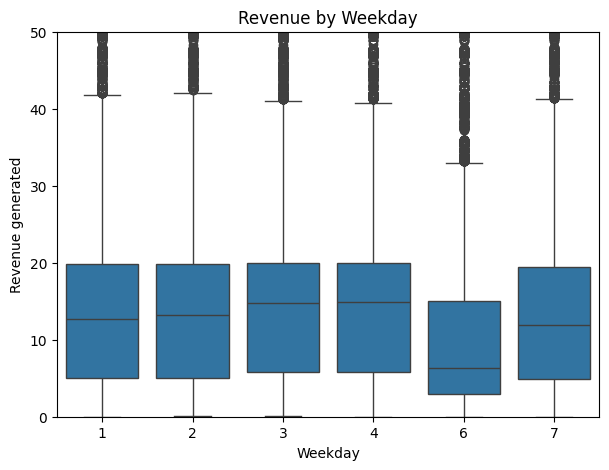

In [71]:
plt.figure(figsize=(7,5))
sns.boxplot(x=x['Weekday'],y=x['TotalAmount'])
plt.title('Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Revenue generated')
plt.ylim(0,50)
plt.show()
# Below is the representation of weekly revenue
# The average revenue is almost consistent throughout the week except on saturdays its less
# and wednesday, thursday has little more .

To analyze seasonality, we need to decompose the time series data into its trend, seasonal, and residual components. This can be done using statsmodels library.

In [72]:
x.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceYear,InvoiceDay,Weekday,MonthlyRevenue,YearlyRevenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,2,1090906.68,572713.89
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,2,1090906.68,572713.89
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,2,1090906.68,572713.89


In [73]:
x['Date']=x['InvoiceDate'].dt.date
decomp_df=pd.DataFrame()
#decomp_df['Date']=x.set_index('Date')
decomp_df['Revenue']=x['TotalAmount']
decomp_df.head()

,Revenue
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [74]:
!pip install statsmodels

Text(0.5, 1.0, 'Seasonality effect')

<Figure size 640x480 with 0 Axes>

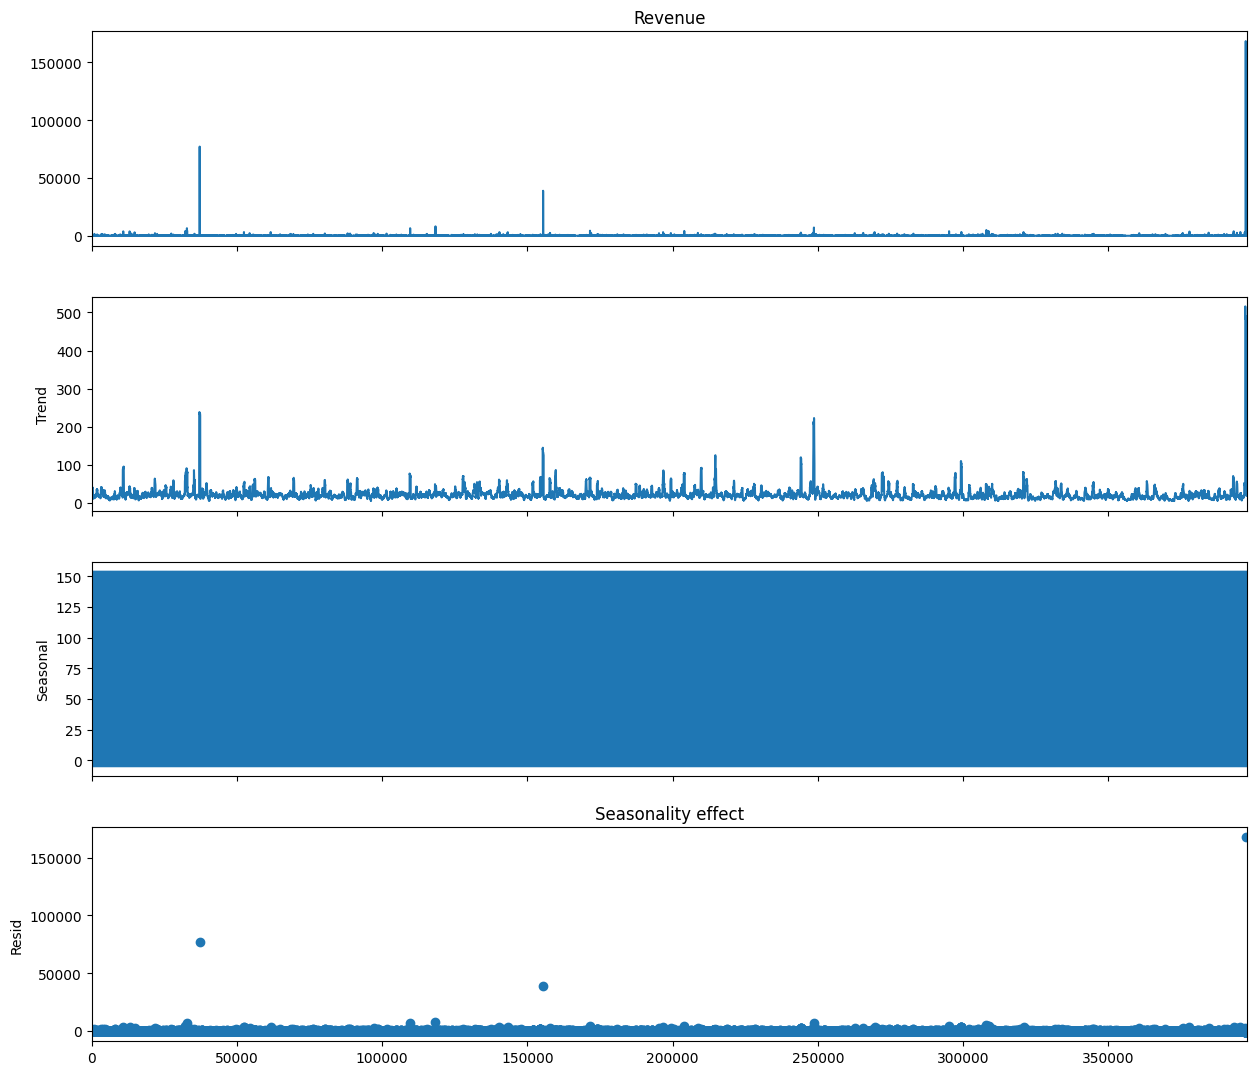

In [75]:
# analysing the trend over the period of a year.
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(decomp_df['Revenue'],model='additive',period=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(14, 12)
plt.title("Seasonality effect")

The graph above shows there isn't any effect of seasons on the sale. The sale remains almost constant throughout the year.

In [76]:
len(x['Description'].unique())

3877

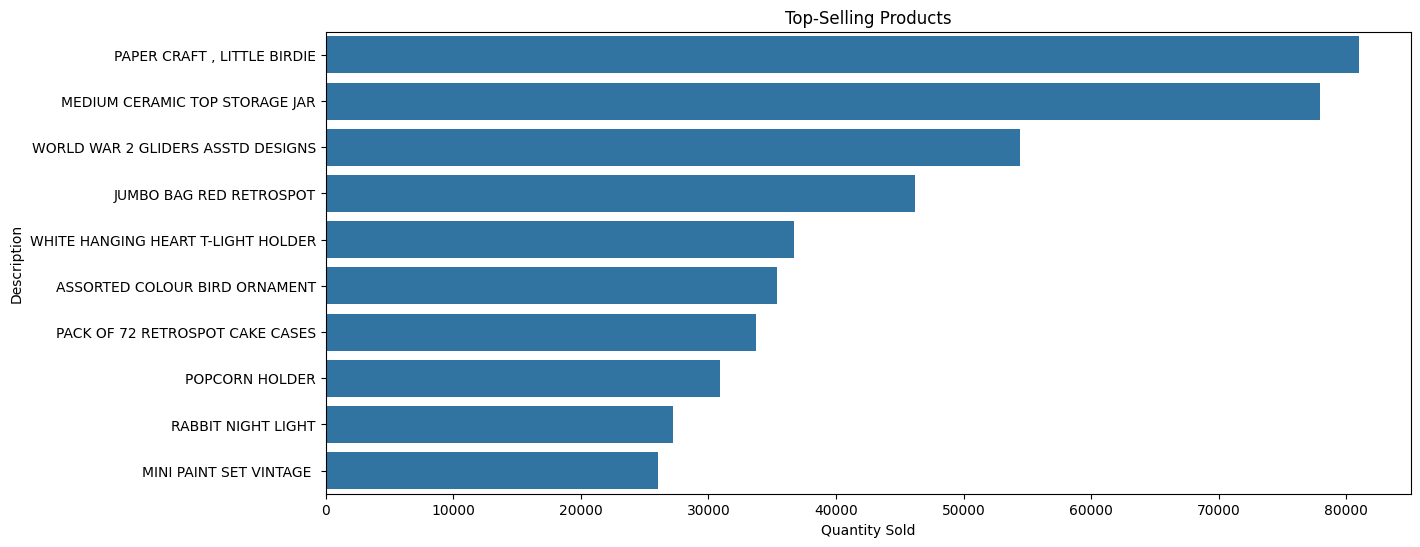

In [77]:
top_products = x.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top-Selling Products')
plt.xlabel('Quantity Sold')
plt.show()
# below graph shows us the top selling product- Paper craft, Little birde

CUSTOMER METRICS


In [78]:
# Total spend per customer
customer_total_spend = x.groupby('CustomerID')['TotalAmount'].sum().reset_index()
customer_total_spend.columns = ['CustomerID', 'TotalSpend']
customer_total_spend.head()


,CustomerID,TotalSpend
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [79]:
# Purchase frequency per customer
customer_purchase_frequency = x.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
customer_purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']
customer_purchase_frequency.head()


,CustomerID,PurchaseFrequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [80]:
# Average spend per visit per customer
customer_avg_spend_per_visit = customer_total_spend.copy()
customer_avg_spend_per_visit['AverageSpendPerVisit'] = customer_total_spend['TotalSpend'] / customer_purchase_frequency['PurchaseFrequency']
customer_avg_spend_per_visit.head()

,CustomerID,TotalSpend,AverageSpendPerVisit
0,12346.0,77183.60,77183.600000
1,12347.0,4310.00,615.714286
2,12348.0,1797.24,449.310000
3,12349.0,1757.55,1757.550000
4,12350.0,334.40,334.400000


In [81]:
customer_metrics = pd.merge(customer_total_spend, customer_purchase_frequency, on='CustomerID')
customer_metrics = pd.merge(customer_metrics, customer_avg_spend_per_visit[['CustomerID', 'AverageSpendPerVisit']], on='CustomerID')
customer_metrics.head()

,CustomerID,TotalSpend,PurchaseFrequency,AverageSpendPerVisit
0,12346.0,77183.60,1,77183.600000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000


PRODUCT METRICS


In [82]:
# Total quantity sold
product_sales_volume = x.groupby('Description')['Quantity'].sum().reset_index()
product_sales_volume.columns = ['Description', 'TotalQuantitySold']

In [83]:
# Average price per product
product_avg_price = x.groupby('Description')['UnitPrice'].mean().reset_index()
product_avg_price.columns = ['Description', 'AveragePrice']

In [84]:
# total revenue per product
product_total_revenue = x.groupby('Description')['TotalAmount'].sum().reset_index()
product_total_revenue.columns = ['Description', 'TotalRevenue']


In [85]:
# Stock turn rate = (total quantity sold / number of unique invoice dates)
product_stock_turn_rate = x.groupby('Description')['InvoiceDate'].nunique().reset_index()
product_stock_turn_rate.columns = ['Description', 'UniqueInvoiceDates']
product_stock_turn_rate['StockTurnRate'] = product_sales_volume['TotalQuantitySold'] / product_stock_turn_rate['UniqueInvoiceDates']


In [86]:

product_metrics = pd.merge(product_sales_volume, product_avg_price, on='Description')
product_metrics = pd.merge(product_metrics, product_total_revenue, on='Description')
product_metrics = pd.merge(product_metrics, product_stock_turn_rate[['Description', 'StockTurnRate']], on='Description')
product_metrics.head()


,Description,TotalQuantitySold,AveragePrice,TotalRevenue,StockTurnRate
0,4 PURPLE FLOCK DINNER CANDLES,140,2.324359,270.76,3.888889
1,50'S CHRISTMAS GIFT BAG LARGE,1885,1.248073,2272.25,17.293578
2,DOLLY GIRL BEAKER,2398,1.243841,2759.50,18.166667
3,I LOVE LONDON MINI BACKPACK,360,4.138571,1454.00,5.294118
4,I LOVE LONDON MINI RUCKSACK,1,4.150000,4.15,1.000000


Moving to building predictive model.

In [87]:
MonthlyRevenue.head()

InvoiceMonth
1    569445.040
2    447137.350
3    595500.760
4    469200.361
5    678594.560
Name: TotalAmount, dtype: float64

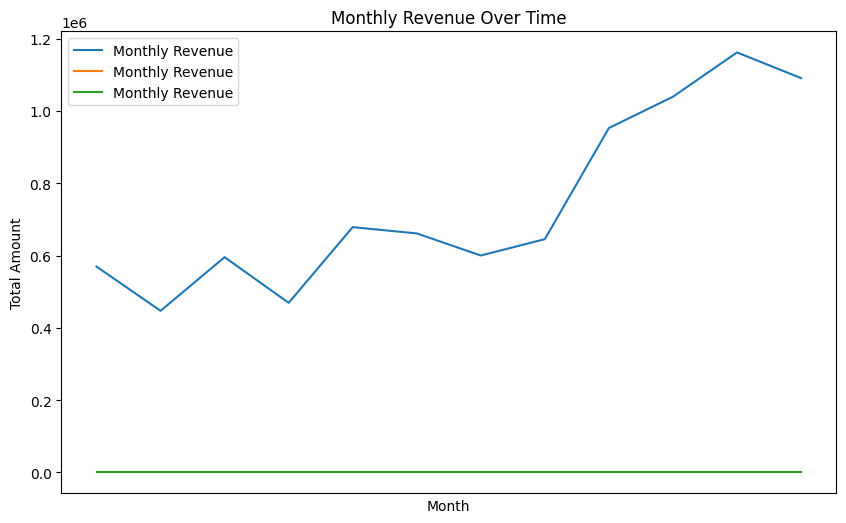

In [102]:
MonthlyRevenue.index=pd.to_datetime(MonthlyRevenue.index)
MonthlyRevenue=pd.DataFrame(MonthlyRevenue)
MonthlyRevenue['Month']=MonthlyRevenue.index.month
MonthlyRevenue['Year']=MonthlyRevenue.index.year
# ploting the time series
plt.figure(figsize=(10, 6))
plt.plot(MonthlyRevenue, label='Monthly Revenue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

The index of the MonthlyRevenue is sorted there with test data we'll predict last two months of revenue.

In [103]:
train_size = int(len(MonthlyRevenue) * 0.8)
train, test = MonthlyRevenue[:train_size], MonthlyRevenue[train_size:]

We'll start with a simple ARIMA model for time series forecasting.
We'll be using monthly revenue data for the prediction.


In [104]:
# fitting arima model
from statsmodels.tsa.arima.model import ARIMA
train['TotalAmount'] = pd.to_numeric(train['TotalAmount'], errors='coerce')
arima_model = ARIMA(train['TotalAmount'], order=(5, 1, 0))
arima_fit = arima_model.fit()

<ipython-input-104-4ac5aeea47e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TotalAmount'] = pd.to_numeric(train['TotalAmount'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates

In [105]:
forecast_arima = arima_fit.forecast(steps=len(test))
forecast_arima = np.array(forecast_arima)


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mae = mean_absolute_error(test['TotalAmount'], forecast_arima)
rmse = sqrt(mean_squared_error(test['TotalAmount'], forecast_arima))
mape = np.mean(np.abs((test['TotalAmount'] - forecast_arima) / test['TotalAmount'])) * 100

In [107]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 144509.01
Root Mean Squared Error (RMSE): 152985.56
Mean Absolute Percentage Error (MAPE): 12.99%


Let's try with random forest regressor

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

rf_model=RandomForestRegressor(random_state=42)
para_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search=GridSearchCV(rf_model,para_grid,cv=5,scoring=scorer)
grid_search.fit(train.drop(['TotalAmount'],axis=1),train['TotalAmount'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [111]:
best_rf = grid_search.best_estimator_# selecting the best random forest regressor model
# after trying multiple hyper tunnings

In [112]:
predictions_rf = best_rf.predict(test.drop(['TotalAmount'],axis=1))
mae_rf = mean_absolute_error(test['TotalAmount'], predictions_rf)
rmse_rf = sqrt(mean_squared_error(test['TotalAmount'], predictions_rf))
mape_rf = np.mean(np.abs((test['TotalAmount'] - predictions_rf) / test['TotalAmount'])) * 100

In [113]:
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

Mean Absolute Error (MAE): 453328.46
Root Mean Squared Error (RMSE): 456101.33
Mean Absolute Percentage Error (MAPE): 41.19%
